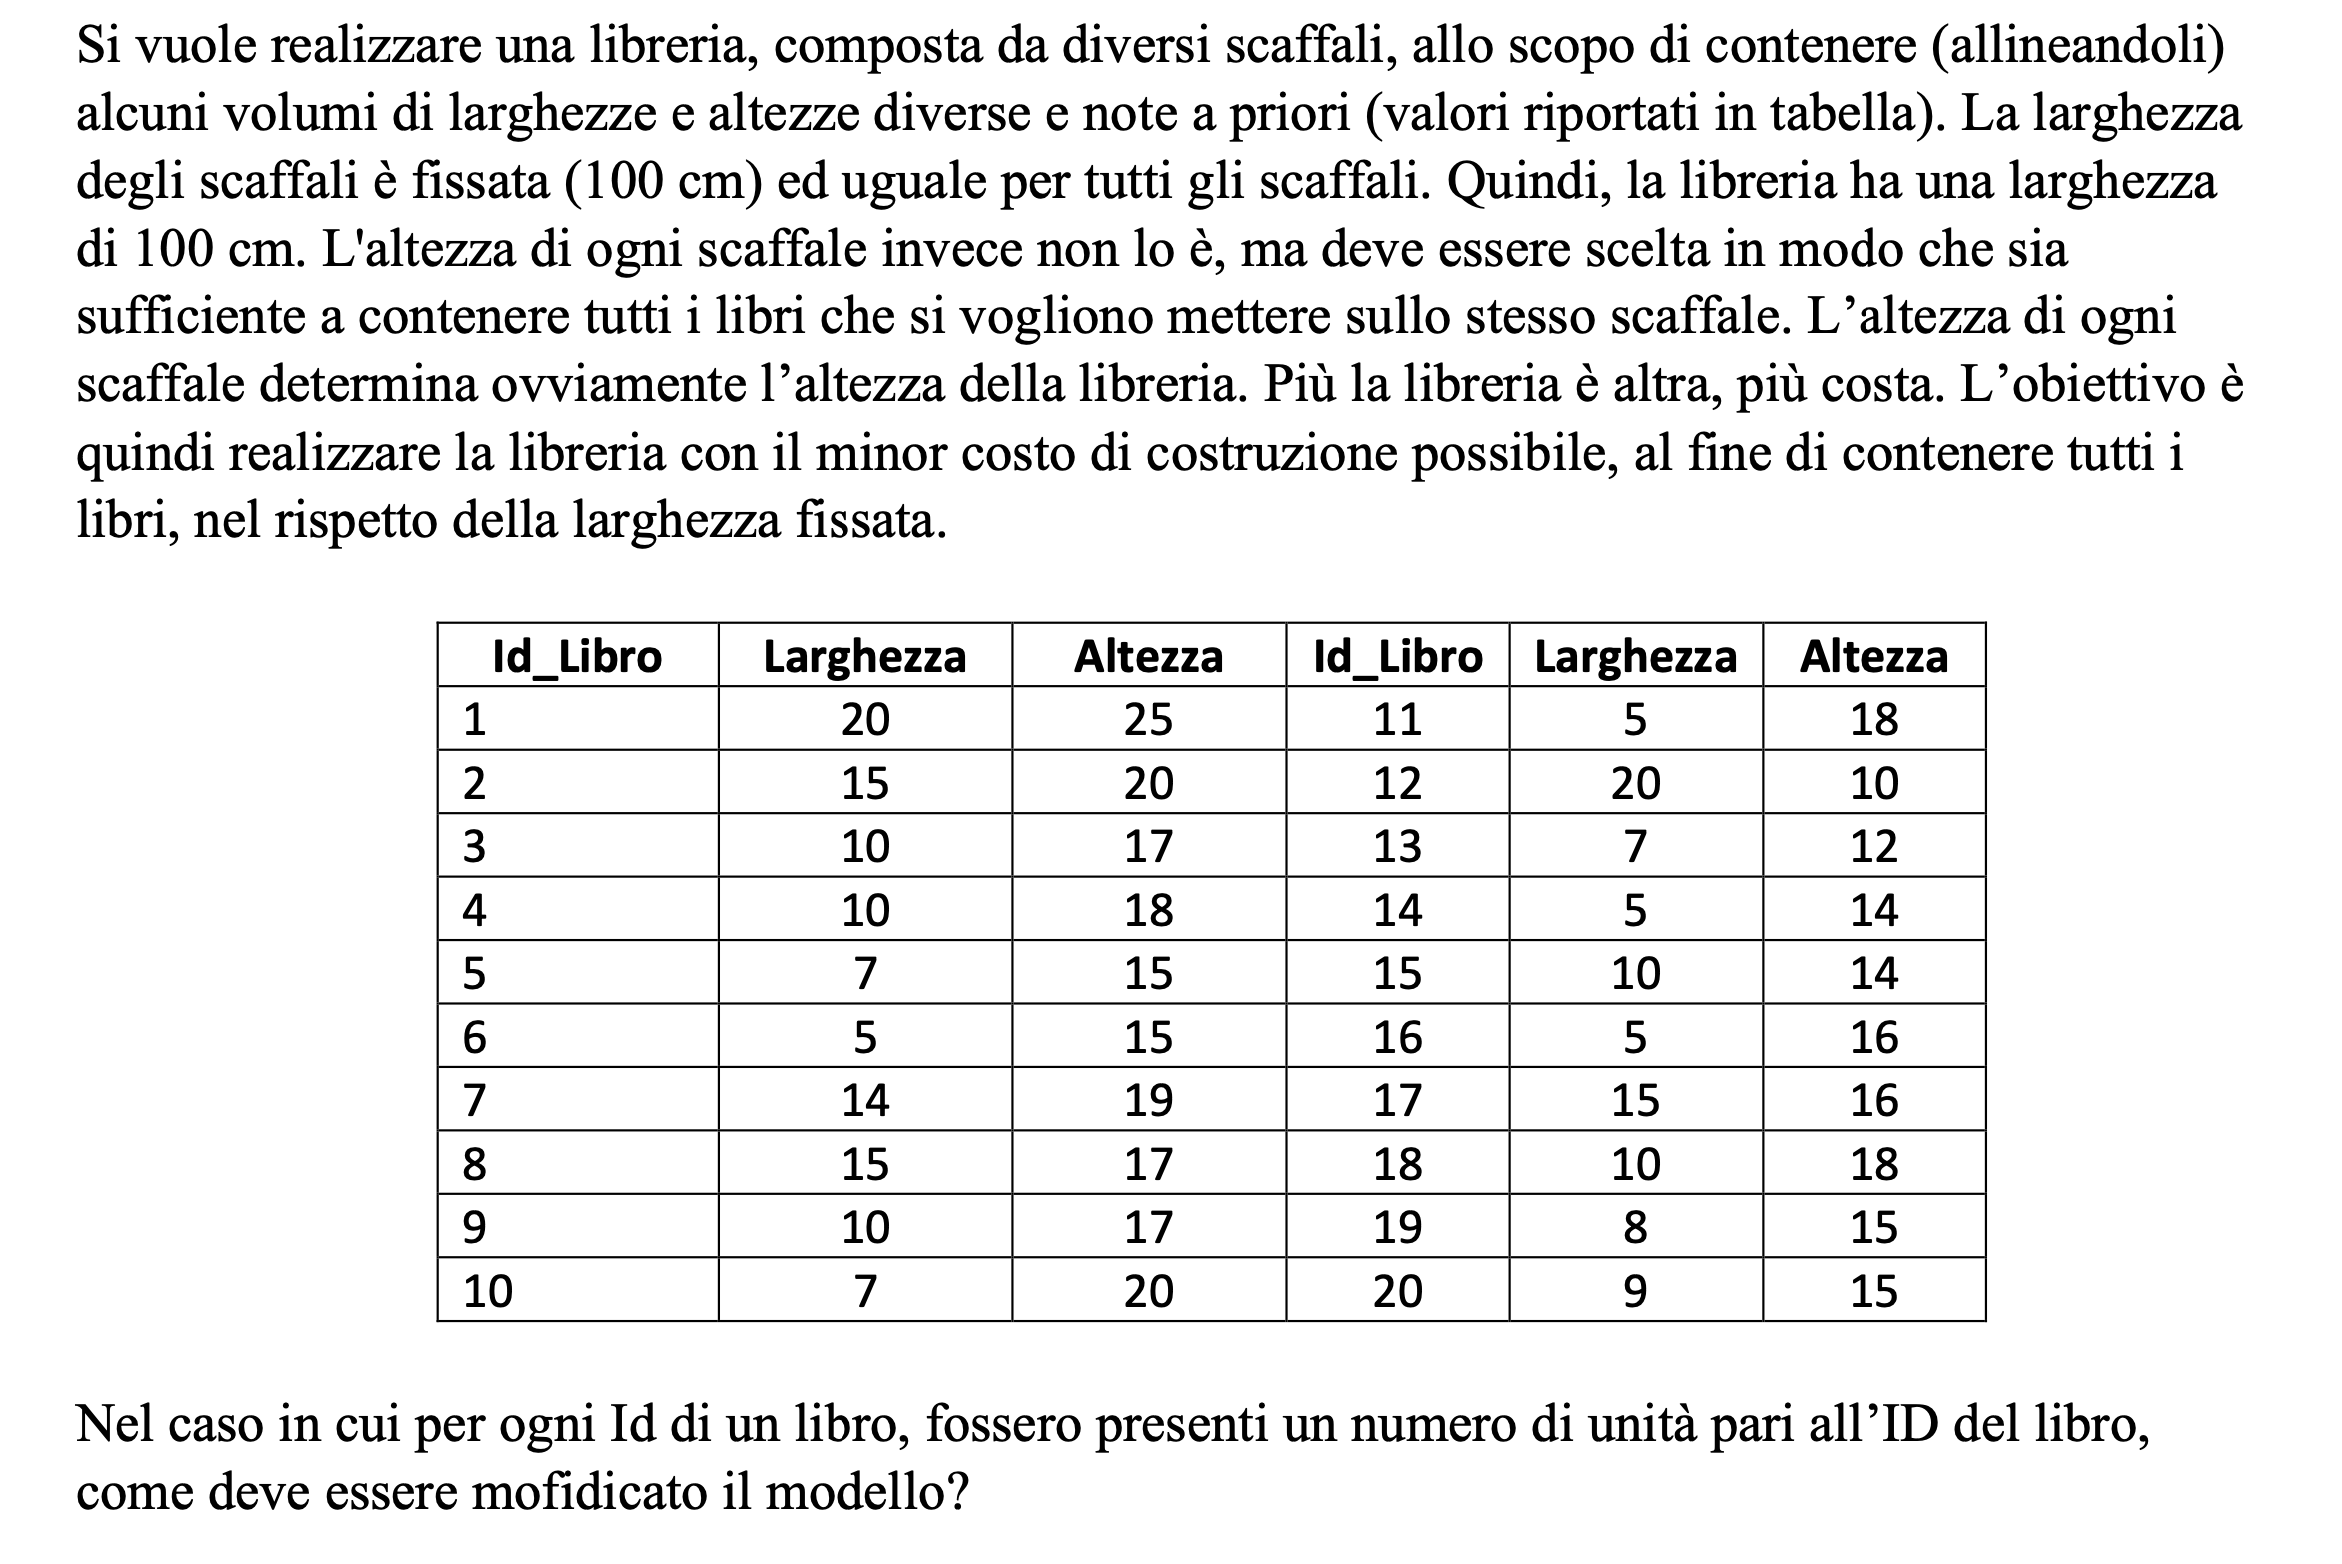

## DATI IN INGRESSO 
$$I = \{1....n\} \quad\quad\quad\quad insieme \ degli \ id \ dei \ libri \ (20)\\
J = \{1....m\} \quad\quad\quad\quad  \ insieme \ massimo \ degli \ scaffali \ (20)$$

## VARIABILI
\begin{equation}
   x_{ij} \ ->
   \begin{cases}
      1 \ se \ il \ libro \ i \ è \ situato \ sullo \ scaffale \ j \\
      0 \ altrimenti \\
   \end{cases}\\
   \\
   \\
   \\
y_j \quad-> \ altezza \ dello \ scaffale \ j\\
\end{equation}

## FORMULAZIONE

\begin{equation}
   min \sum_{j \in J} y_j\\
   s.t.  \\
   \sum_{j \in J} x_{ij} = 1 \quad \quad \forall \ i \in I \\
   \sum_{i \in I} l_i x_{ij} \leq 100 \quad \quad \forall \ j \in J \\
   y_j \geq a_i x_{ij} \quad \quad \forall \ j \in J, \ i \in I \\
   y_{j+1} \leq y_j \quad \quad \forall \ j \in J \\
   y_j \geq 0 \quad \quad \quad \forall \ j \in J \\
   x_{ij}\in\{0,1\} \quad \quad \forall \ j \in J, \ i \in I 
\end{equation}

### LETTURA DEI PARAMETRI DA FILE

In [1]:
file = open('esame.rtf','r')
filelines = file.readlines()

num_line = 1
line = filelines[num_line].split()
numlib = range(int(line[0]))
numscaf = range(20)

num_line = num_line + 2
SIZE = []
for i in numlib:
    sizeline = []
    line = filelines[num_line].split()
    for j in range(1,3):
        sizeline.append(int(line[j]))
    SIZE.append(sizeline)
    num_line = num_line +1

### RICHIAMA LA LIBRERIA GUROBI E INIZIALIZZA IL MODELLO

In [68]:
import gurobipy as gp
from gurobipy import GRB

# Inizializza il modelo
mod = gp.Model('Esame')

### DEFINIZIONE VARIABILI

In [69]:
x = mod.addVars(numlib,numscaf, vtype = GRB.BINARY, name = 'x')
y = mod.addVars(numscaf, vtype = GRB.CONTINUOUS, name = 'y')

### FUNZIONE OBIETTIVO 

\begin{equation}
min \sum_{j \in J} y_j\\
\end{equation}

In [70]:
obj = mod.setObjective(gp.quicksum(y[j] for j in numscaf), GRB.MINIMIZE)

### VINCOLI DI AFFERENZA

\begin{equation}
\sum_{j \in J} x_{ij} = 1 \quad \quad \forall \ i \in I \\
\end{equation}

In [71]:
mod.addConstrs(gp.quicksum(x[i,j] for j in numscaf) == 1 for i in numlib)

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>}

### VINCOLI SULLA LARGHEZZA DEGLI SCAFFALI

\begin{equation}
\sum_{i \in I} l_i x_{ij} \leq 100 \quad \quad \forall \ j \in J \\
\end{equation}

In [72]:
mod.addConstrs(gp.quicksum(SIZE[i][0]*x[i,j] for i in numlib) <= 100 for j in numscaf)

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>}

### VINCOLI SULL'ALTEZZA DEGLI SCAFFALI

\begin{equation}
y_j \geq a_i x_{ij} \quad \quad \forall \ j \in J, \ i \in I \\
\end{equation}

In [73]:
mod.addConstrs((y[j])>= SIZE[i][1]*x[i,j] for j in numscaf for i in numlib)

{(0, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 5): <gurobi.Constr *Awaiting Model Update*>,
 (0, 6): <gurobi.Constr *Awaiting Model Update*>,
 (0, 7): <gurobi.Constr *Awaiting Model Update*>,
 (0, 8): <gurobi.Constr *Awaiting Model Update*>,
 (0, 9): <gurobi.Constr *Awaiting Model Update*>,
 (0, 10): <gurobi.Constr *Awaiting Model Update*>,
 (0, 11): <gurobi.Constr *Awaiting Model Update*>,
 (0, 12): <gurobi.Constr *Awaiting Model Update*>,
 (0, 13): <gurobi.Constr *Awaiting Model Update*>,
 (0, 14): <gurobi.Constr *Awaiting Model Update*>,
 (0, 15): <gurobi.Constr *Awaiting Model Update*>,
 (0, 16): <gurobi.Constr *Awaiting Model Update*>,
 (0, 17): <gurobi.Constr *Awaiting Model Update*>,
 (0, 18): <gurobi.Constr *Awaiting Model Update*>,
 (0, 19): <gurobi.Constr *Awaiting Model 

### VINCOLI SULL'ORDINE DEGLI SCAFFALI

\begin{equation}
y_{j+1} \leq y_j \quad \quad \forall \ j \in J \\
\end{equation}

In [74]:
mod.addConstrs((y[j+1])<= y[j] for j in range(19))

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>}

# SOLUZIONE DEL PROBLEMA

## RISOLUZIONE DEL PROBLEMA TRAMITE LIBRERIA GUROBI

In [75]:
mod.optimize()
if mod.status == GRB.OPTIMAL:
    print (mod.objval)
    mod.write('esame.sol')
mod.write('esame.lp')

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[arm])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 459 rows, 420 columns and 1638 nonzeros
Model fingerprint: 0xc90b2aa4
Variable types: 20 continuous, 400 integer (400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Found heuristic solution: objective 285.0000000
Presolve removed 94 rows and 70 columns
Presolve time: 0.02s
Presolved: 365 rows, 350 columns, 2018 nonzeros
Variable types: 0 continuous, 350 integer (330 binary)

Root relaxation: objective 3.382172e+01, 86 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   33.82172    0   62  285.00000   33.82172  88.1%     -    0s
H    

## STAMPA LA SOLUZIONE

In [76]:
if mod.status == GRB.OPTIMAL:
    print("L'altezza della libreria è: ", mod.objval, "cm")
    print("Gli scaffali usati e le relative altezze sono:")
    for j in numscaf:
        if y[j].x > 0.5:
            print("Scaffale", j+1, "=", y[j].x, "cm")
    print ()
    print("Afferenze libri:")
    for i in numlib:
        for j in numscaf:
            if x[i,j].x > 0.5 :
                print("Il libro", i+1, "afferisce allo scaffale",j+1)


L'altezza della libreria è:  52.0 cm
Gli scaffali usati e le relative altezze sono:
Scaffale 1 = 25.0 cm
Scaffale 2 = 17.0 cm
Scaffale 3 = 10.0 cm

Afferenze libri:
Il libro 1 afferisce allo scaffale 1
Il libro 2 afferisce allo scaffale 1
Il libro 3 afferisce allo scaffale 2
Il libro 4 afferisce allo scaffale 1
Il libro 5 afferisce allo scaffale 2
Il libro 6 afferisce allo scaffale 2
Il libro 7 afferisce allo scaffale 1
Il libro 8 afferisce allo scaffale 1
Il libro 9 afferisce allo scaffale 2
Il libro 10 afferisce allo scaffale 1
Il libro 11 afferisce allo scaffale 1
Il libro 12 afferisce allo scaffale 3
Il libro 13 afferisce allo scaffale 2
Il libro 14 afferisce allo scaffale 2
Il libro 15 afferisce allo scaffale 2
Il libro 16 afferisce allo scaffale 2
Il libro 17 afferisce allo scaffale 2
Il libro 18 afferisce allo scaffale 1
Il libro 19 afferisce allo scaffale 2
Il libro 20 afferisce allo scaffale 2
